<a href="https://colab.research.google.com/github/Kzis/thai-handwritten-recognition-model/blob/master/data_augmention_thw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib.pyplot import imread, imshow, subplots, show , imsave
import glob

In [0]:
def read_img(img):
    full_path = img.split("/")
    path = full_path[0] + "/" + full_path[1]
    full_filename = full_path[2].split(".")
    filename = full_filename[0]
    file_extension = full_filename[1]
    image = imread(img)
    images = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    return images,filename,file_extension

In [0]:
def plot(imges_tup,data_generator,generator_type):
    images,filename,file_extension = imges_tup

    data_generator.fit(images)
    image_iterator = data_generator.flow(images 
                                         ,save_to_dir=output_path
                                         ,save_prefix=filename + "_" +generator_type
                                         ,save_format=file_extension)
 
    fig, rows = subplots(nrows=1, ncols=4, figsize=(18,18))
    for idx , row in enumerate(rows, start=1):
        row.imshow(image_iterator.next()[0].astype('int'))
        row.axis('off')
    show()

In [0]:
# 1. Rotation
def rotation(images):
  print("rotation process")
  data_generator = ImageDataGenerator(rotation_range=90)
  plot(images,data_generator,"rotation")

In [0]:
# 2. Width Shifting
def width_shifting(images):
  print("width_shifting process")
  data_generator = ImageDataGenerator(width_shift_range=0.3)
  plot(images,data_generator,"width_shifting")

In [0]:
# 3. Height Shifting
def height_shifting(images):
  print("height_shifting process")
  data_generator = ImageDataGenerator(height_shift_range=0.3)
  plot(images,data_generator,"height_shifting")

In [0]:
# 4. Brightness
def brightness(images):
  print("brightness process")
  data_generator = ImageDataGenerator(brightness_range=(0.1, 0.9))
  plot(images,data_generator,"brightness")

In [0]:
# 5. Shear Intensity
def shear_intensity(images):
  print("shear_intensity process")
  data_generator = ImageDataGenerator(shear_range=45.0)
  plot(images,data_generator,"shear_intensity")

In [0]:
# 6. Zoom
def zoom(images):
  print("zoom process")
  data_generator = ImageDataGenerator(zoom_range=[0.5, 1.5])
  plot(images,data_generator,"zoom")

In [0]:
# 7. Channel Shift
def channel_shift(images):
  print("channel_shift process")
  data_generator = ImageDataGenerator(channel_shift_range=150.0)
  plot(images,data_generator,"channel_shift")

In [0]:
# 8. Horizontal Flip
def horizontal_flip(images):
  print("horizontal_flip process")
  data_generator = ImageDataGenerator(horizontal_flip=True)
  plot(images,data_generator,"horizontal_flip")

In [0]:
# 9. Vertical Flip
def vertical_flip(images):
  print("vertical_flip process")
  data_generator = ImageDataGenerator(vertical_flip=True)
  plot(images,data_generator,"vertical_flip")

In [0]:
import zipfile
import os
import sys

def zipfolder(foldername, target_dir):            
    zipobj = zipfile.ZipFile(foldername + '.zip', 'w', zipfile.ZIP_DEFLATED)
    rootlen = len(target_dir) + 1
    for base, dirs, files in os.walk(target_dir):
        for file in files:
            fn = os.path.join(base, file)
            zipobj.write(fn, fn[rootlen:])

Process folder 1 / 2 
Process folder : ข
Process img 1 / 2 
rotation process


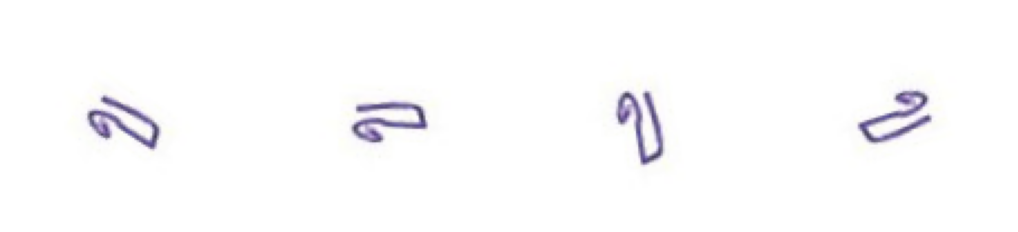

width_shifting process


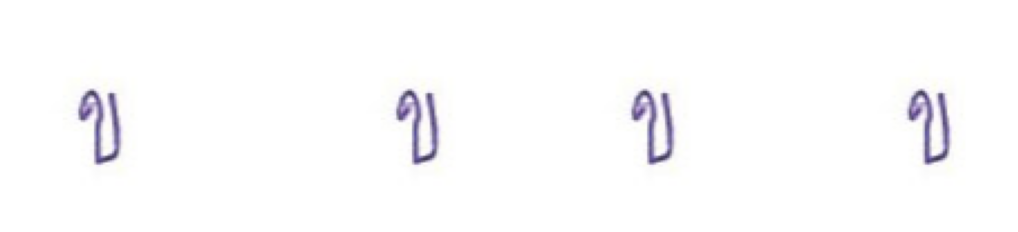

height_shifting process


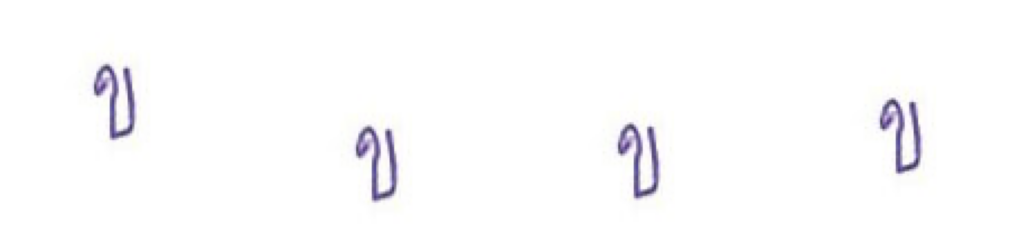

zoom process


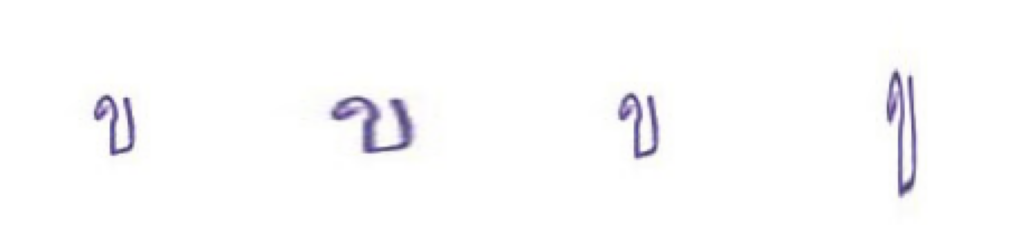

Process img 2 / 2 
rotation process


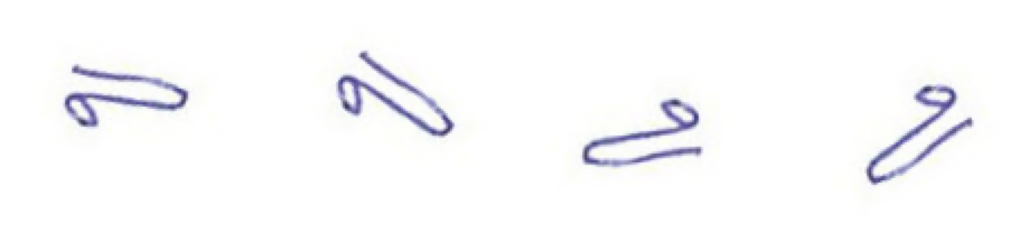

width_shifting process


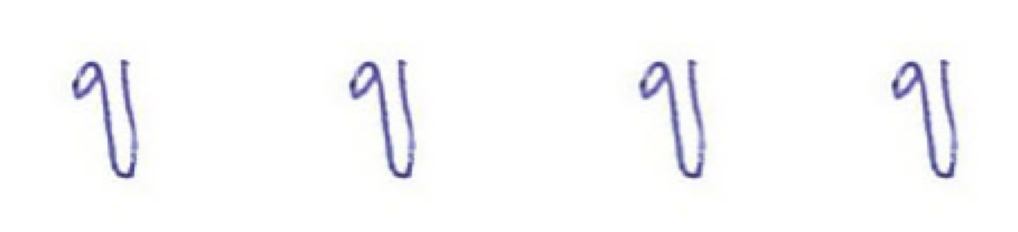

height_shifting process


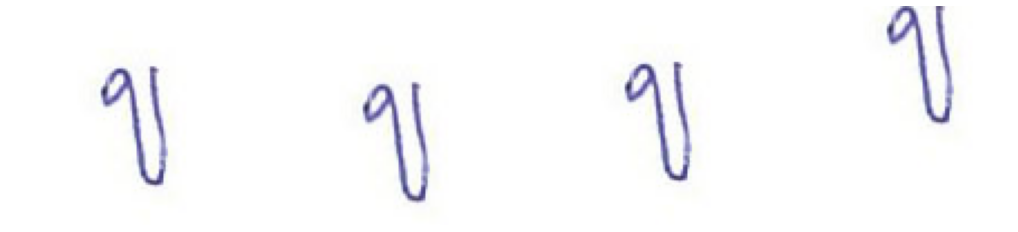

zoom process


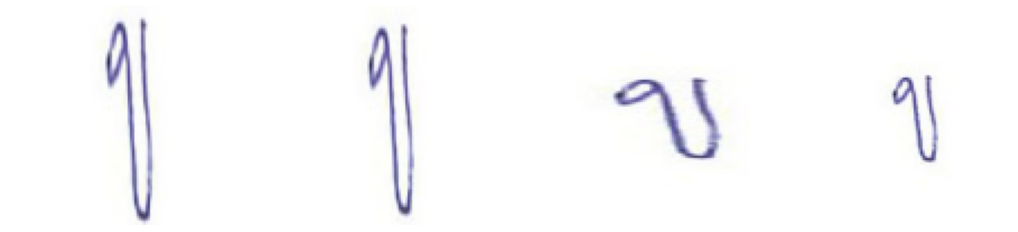

-----------
Process folder 2 / 2 
Process folder : ก
Process img 1 / 2 
rotation process


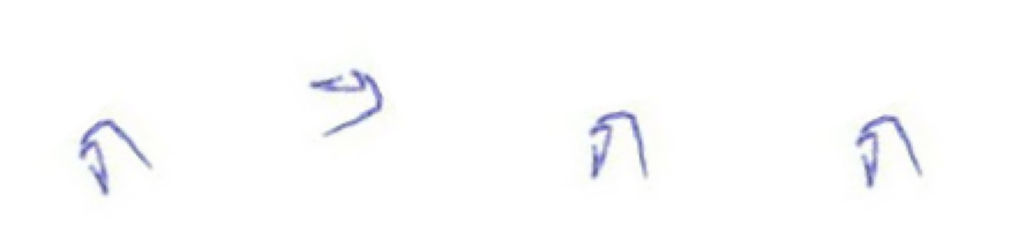

width_shifting process


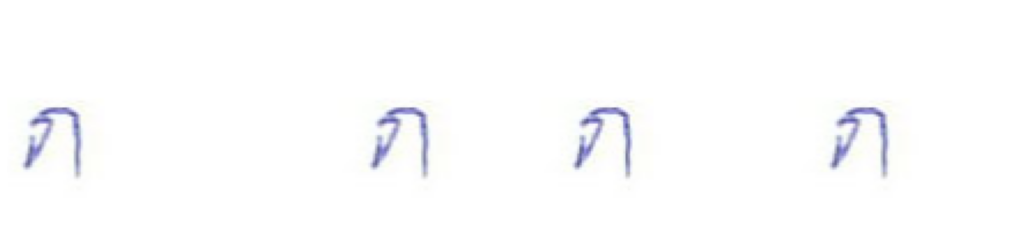

height_shifting process


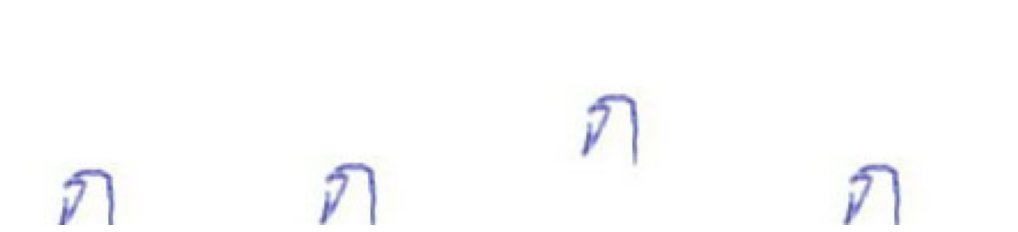

zoom process


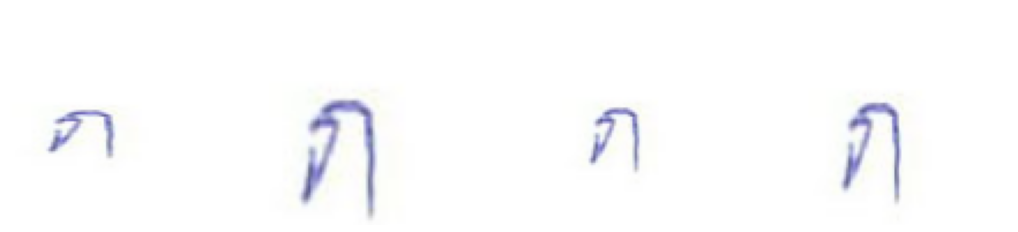

Process img 2 / 2 
rotation process


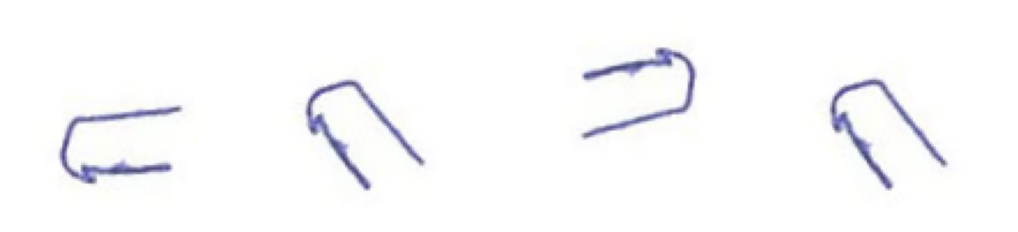

width_shifting process


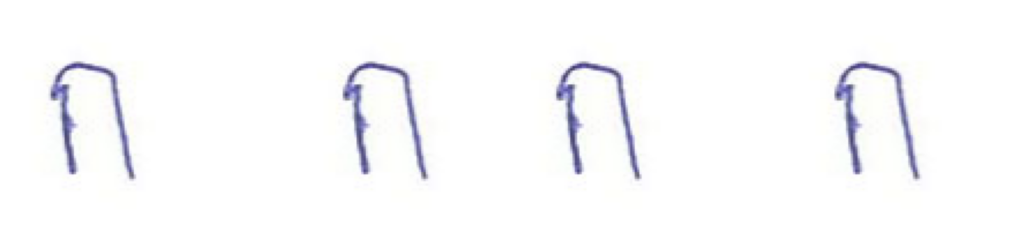

height_shifting process


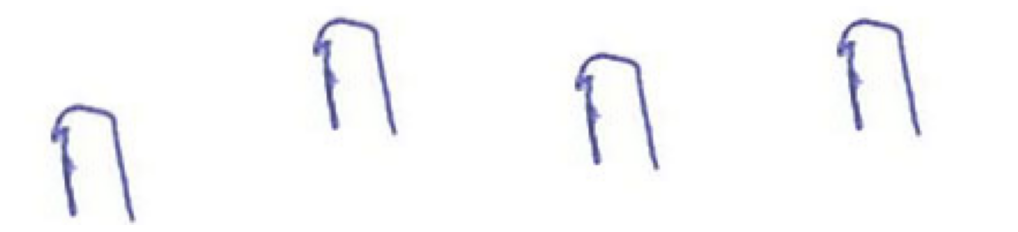

zoom process


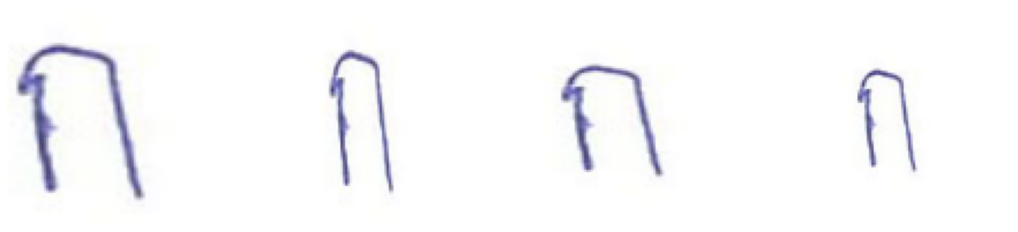

-----------


In [0]:
read_path = "extract/*"
read_path_img = "/*.jpg"
zipname = 'thw_written'
output_path = "extract_out/"

folder_count = 0
for folder in glob.glob(read_path):
    folder_count += 1

# Read image all directory
for idx , folder in enumerate(glob.glob(read_path)):
    folder_name = folder.split("/")[1]

    print("Process folder {} / {} ".format(idx+1, folder_count))
    print("Process folder : " + folder_name)
 
    sub_path =  folder + read_path_img
    output_path = "extract_out/"
    output_path = output_path + folder_name

    file_count = 0
    for file in glob.glob(sub_path):
        file_count += 1    

    for idxx , img in enumerate(glob.glob(sub_path)):
      print("Process img {} / {} ".format(idxx+1, file_count))
      images = read_img(img)
      
      rotation(images)
      width_shifting(images)
      height_shifting(images)
      # brightness(images)
      # shear_intensity(images)
      zoom(images)
      # channel_shift(images)
      # horizontal_flip(images)
      # vertical_flip(images)
      print("===================")

    print("-----------")

zipfolder(zipname, 'extract_out')